Vec3(0, 0.49999999999999994, 0.8660254037844387) (0.5, 0.5)
Vec3(-0.34990621040508374, 4.285115205743661e-17, 0.936784737236871)
(0.03938309951855752, 0.03695342345593949) (0.020007723655024644, 0.017876761312201887, <vec3.Vec3 object at 0x112a086a0>, <vec3.Vec3 object at 0x112a08748>)
Vec3(-0.1432100323585176, -0.49999999999999994, 0.8541023865040259)
(0.05362388480800817, 0.04580028798813677) (0.053623884808006964, 0.04580028798813573, <vec3.Vec3 object at 0x112a08860>)


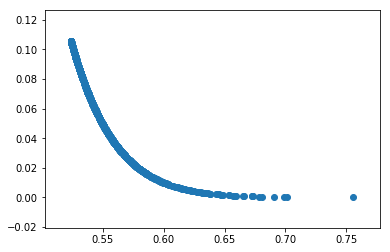

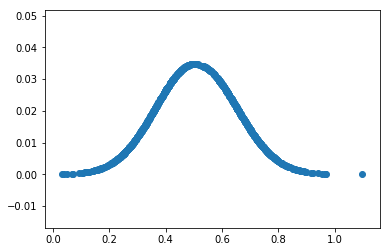

In [1]:
import brdf;
import vec3;
import math;
import random;
import matplotlib.pyplot as plt;
import microfacet;
alpha = .1
zipin= brdf.ZipinBrdf(alpha, alpha);
theta_o = math.pi /6.0;
wo = vec3.Vec3(0, math.sin(theta_o), math.cos(theta_o));
u = (.5, .5)
#wo = vec3.Vec3(random.uniform(0,1), random.uniform(0, 1), random.uniform(0, 1));
#u = (random.uniform(0,1), random.uniform(0, 1));
print(wo, u)
zsample =zipin.Sample(wo, u);
if zsample[0]>0:
    zeval = zipin.Eval(wo, zsample[2]);
    print(zsample[2])
    print(zeval, zsample);

beckman = brdf.Brdf(alpha, alpha);
bsample = beckman.Sample(wo, u);
if bsample[0]>0:
    beval = beckman.Eval(wo, bsample[2]);
    print(bsample[2]);
    print(beval, bsample);
    



phi_o = math.pi * 2.0 * random.uniform(0,1);
#wo = vec3.Vec3(math.sin(theta_o) * math.sin(phi_o), math.sin(theta_o)* math.cos(phi_o), math.cos(theta_o));
xdata= [];              
zdata=[]; 
bdata = [];
zsamples = []
bsamples = []
for i in range(1000):
    #u = (random.uniform(0, 1), random.uniform(0, 1))
    u= (random.uniform(0, 1), .5)
    zsample = zipin.Sample(wo, u);
    bsample = beckman.Sample(wo, u)
    if zsample[0] > 0:
        thetaI = math.acos(zsample[2].z)
        zsamples.append((thetaI, zsample[0]))
    if bsample[0] > 0:
        thetaI = math.acos(bsample[2].z)
        bsamples.append((thetaI, bsample[0]))
        #bsamples.append((math.pi-thetaI, bsample[0]))
        #bsamples.append((thetaI - math.pi, bsample[0]))
        #bsamples.append((theta_o - thetaI, bsample[0]))
        #bsamples.append((theta_o + thetaI, bsample[0]))
        #bsamples.append((thetaI+2.0 *math.pi, bsample[0]))
bsamples.sort(key = lambda x: x[0])

    

for s in bsamples:
    xdata.append(s[0])
    bdata.append(s[1])
plt.scatter(xdata, bdata);
plt.autoscale(True, 'both', False)
plt.show()  

xdata.clear()
bdata.clear()
for s in zsamples:
    xdata.append(s[0])
    bdata.append(s[1])
plt.scatter(xdata, bdata);
plt.autoscale(True, 'both', False)
plt.show()  
     




    




1.4448341712182988 -0.46579906503072


0.8668083907638165


0.2447587765468946 0.24475877654689454
